In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy import signal
from scipy import integrate
import time
import seaborn as sns
from math import sqrt
#sns.set_theme()

(0, 6.283185307179586)

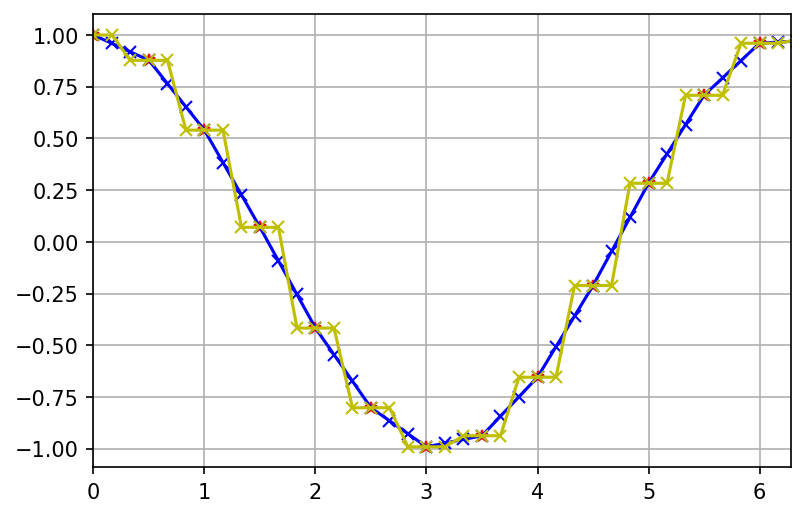

In [9]:
def my_interp1d(x, y, kind = "linear"):
    if kind=="linear":
        def returnfunc(x0_ar, x = x, y = y):
            i = 0;
            result = []
            #zeby dzialalo jak dam pojedyncza liczbe
            try:
                iterator = iter(x0_ar)
            except TypeError:
                x0_ar = [x0_ar]
            else:
                pass
            for x0 in x0_ar:
                x1 = 0
                x2 = 1
                while(x0>x[i] and i<len(x)):
                    i+=1
                x1 = i-1
                x2 = i
                result.append(y[x1]+(y[x2]-y[x1])/(x[x2]-x[x1])*(x0-x[x1]))
            return result
        return returnfunc
    if kind=="nearest":
        def returnfunc(x0_ar, x = x, y = y):
            i = 1;
            result = []
            #zeby dzialalo jak dam pojedyncza liczbe
            try:
                iterator = iter(x0_ar)
            except TypeError:
                x0_ar = [x0_ar]
            else:
                pass
            for x0 in x0_ar:
                x1 = 0
                x2 = 1
                while(x0>x[i] and i<len(x)):
                    i+=1
                if(abs(x0-x[i])>abs(x0-x[i-1])):
                    x1 = i-1
                else:
                    x1 = i
                result.append(y[x1])
            return result
        return returnfunc



start = 0
stop = 2*np.pi
step = 0.5

x = np.arange(start, stop + step, step)
y = np.cos(x)
divider = 3
y_interp_linear = my_interp1d(x, y, kind='linear')
y_interp_nearest = my_interp1d(x, y, kind='nearest')
x_dense = np.arange(start, stop + step/divider, step/divider)
y_linear = y_interp_linear(x_dense)
y_nearest = y_interp_nearest(x_dense)
plt.figure(dpi=150)
plt.plot(x, y, "r*")
plt.plot(x_dense, y_linear, "b-x")
#plt.plot(x_dense, y_cubic, "g-x")
plt.plot(x_dense, y_nearest, "y-x")
#plt.plot(x_dense, y_ideal, "m-x")
plt.grid(True)
plt.xlim([start, stop])


(-3, 3)

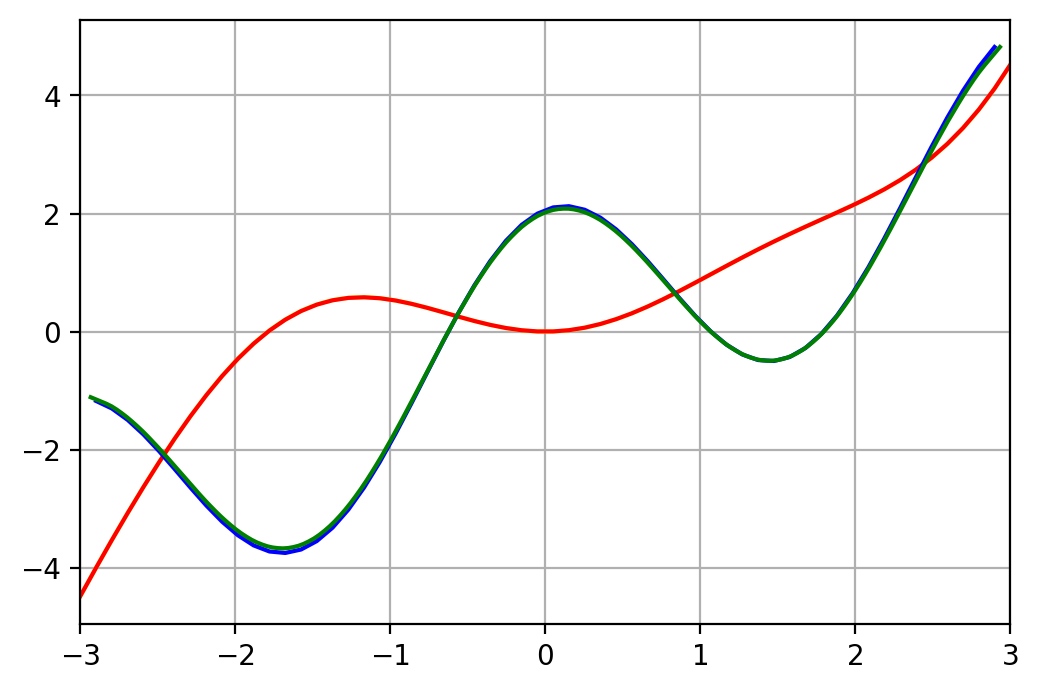

In [28]:
#zad2
#convolve 2nd derivative

start = -3
stop = 3
step = 0.1
divider = 3
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples)
x_dense = np.linspace(start, stop, samples*divider)
y = np.sin(x)**2+(1/6)*x**3
y_interp = interp.interp1d(x, y, kind='cubic')
y_cub = y_interp(x_dense)
ddy = signal.convolve(y, np.array([1, -2, 1]), mode = "valid")/(step**2)
dy_interp = np.gradient(y_cub, step/divider)
ddy_interp = np.gradient(dy_interp, step/divider)
plt.figure(dpi=200)
plt.plot(x_dense, y_cub, color = "yellow")
plt.plot(x, y, "r-")

plt.plot(x[1:-1], ddy, "b-")
plt.plot(x_dense[2:-2], ddy_interp[2:-2], "g-")
plt.grid(True)
plt.xlim([start, stop])



(24, 24)
(48, 48)


(-0.5, 47.5, 47.5, -0.5)

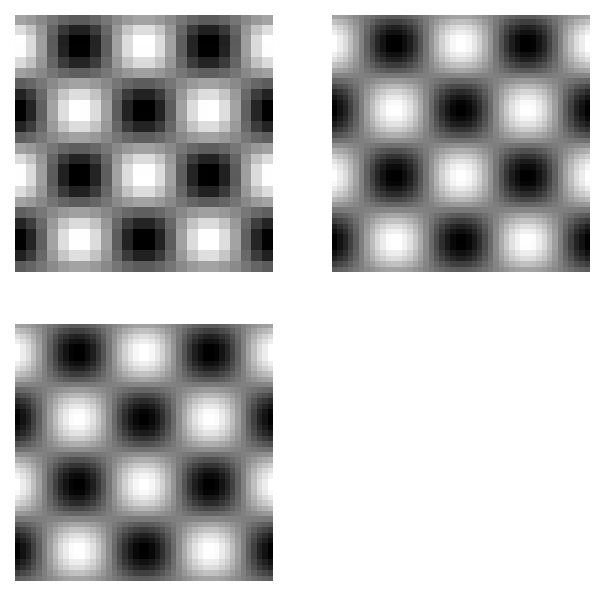

In [155]:
#zadanie 3
def my_interp2d(grid, values, points, mode = "linear"):
    results = np.zeros(shape = points[0].shape)
    for itx in range(len(np.array(points)[0, 0, :])):
        for ity in range(len(np.array(points)[1, :, 0])):
            i = 0
            j = 0
            x_coor = np.array(points)[0, 0, itx]
            y_coor = np.array(points)[1, ity, 0]
            
            while(np.array(grid)[0, 0, i]<x_coor and i<len(np.array(grid)[0, 0, :])): 
                i = i + 1
            while(np.array(grid)[1, j, i]<y_coor and j<len(np.array(grid)[1, :, 0])):
                j = j + 1
            x1 = np.array(grid)[0, 0, i-1]
            x2 = np.array(grid)[0, 0, i]
            y1 = np.array(grid)[1, j-1, i]
            y2 = np.array(grid)[1, j, i]
            z11, z12, z21, z22 = values[i-1, j-1], values[i-1, j], values[i, j-1], values[i, j]
            f1 = (x_coor - x2)/(x1-x2)*z11 + (x_coor-x1)/(x2-x1)*z21
            f2 = (x_coor - x2)/(x1-x2)*z12 + (x_coor-x1)/(x2-x1)*z22
            #pom1 = values[i-1, j-1] + (values[i, j-1] - values[i-1, j])/(x2 - x1)*(x_coor-x1)
            #pom2 = values[i-1, j] + (values[i, j] - values[i-1, j-1])/(x2 - x1)*(x_coor-x1)
            if(j == 0):
                #results[itx, ity] = values[i-1, j] + (values[i, j] - values[i-1, j])/(x2 - x1)*(x_coor-x1)
                results[itx, ity] = f2
            #if(i == 0):
                #results[itx, ity] = values[i, j-1] + (values[i, j] - values[i, j-1])/(y2 - y1)*(y_coor-y1)
                #print("i = 0")
                #print(results[itx, ity])
            if(j != 0):
                #results[itx, ity] = pom2 + (pom2-pom1)/(y2 - y1)*(y_coor-y1)
                results[itx, ity] = (y_coor-y2)/(y1-y2)*f1 + (y_coor-y1)/(y2-y1)*f2
    return results
start = -6
stop = 6
step = 0.5
samples = int((stop - start)/step)

x = np.linspace(start, stop, samples)
y = np.linspace(start, stop, samples)
xs, ys = np.meshgrid(x, y)
zs = np.cos(xs)*np.sin(ys)

step_new = 0.25
samples_new = int((stop - start) / step_new)
x_new = np.linspace(start, stop, samples_new)
y_new = np.linspace(start, stop, samples_new)
xs_new, ys_new = np.meshgrid(x_new, y_new)
zs_linear = my_interp2d([xs, ys], zs, [xs_new, ys_new])
zs_new_linear = interp.interpn((x, y), zs, (ys_new, xs_new), method='linear')
rows = 2
cols = 2
print(zs.shape)
print(zs_linear.shape)
plt.figure(dpi=150, figsize=(5, 5))
plt.subplot(rows, cols, 1)
plt.imshow(zs, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(zs_linear, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(zs_new_linear, cmap='gray')
plt.grid(False)
plt.axis('off')

In [20]:
#Zadanie 4
def interp_for_quad(x, y):
    def returnfunc(x0, x, y):
        i = 1
        while(x0>x[i] and i<len(x)):
            i+=1
        x1 = i-1
        x2 = i
        return (y[x1]+(y[x2]-y[x1])/(x[x2]-x[x1])*(x0-x[x1]))
    return returnfunc

start = 0
stop = np.pi
step = 0.5

x = np.arange(start, stop + step, step)
y = np.sin(x)
divider = 3
y_interp_quad = interp_for_quad(x, y)
result_quad = integrate.quad(y_interp_quad, start, stop, args = (x, y),points = x[1:-1])
print("Result quad: ", result_quad)




Result quad:  (1.9584801869408754, 2.1743497968139406e-14)
